In [2]:
from nba_api.stats.static import players
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

pd.set_option('display.max_rows', 10)

# Get all players from nba_api and store in variable
playerList = players.get_players()

In [3]:
players_df = pd.DataFrame(playerList)
players_df

,id,full_name,first_name,last_name,is_active
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False
1,76002,Zaid Abdul-Aziz,Zaid,Abdul-Aziz,False
2,76003,Kareem Abdul-Jabbar,Kareem,Abdul-Jabbar,False
3,51,Mahmoud Abdul-Rauf,Mahmoud,Abdul-Rauf,False
4,1505,Tariq Abdul-Wahad,Tariq,Abdul-Wahad,False
...,...,...,...,...,...
4496,1627790,Ante Zizic,Ante,Zizic,True
4497,78647,Jim Zoet,Jim,Zoet,False
4498,78648,Bill Zopf,Bill,Zopf,False
4499,1627826,Ivica Zubac,Ivica,Zubac,True


In [4]:
# cut down list to contain only ACTIVE players
act_df = players_df.loc[players_df["is_active"]==True]
act_df

,id,full_name,first_name,last_name,is_active
21,203500,Steven Adams,Steven,Adams,True
23,1628389,Bam Adebayo,Bam,Adebayo,True
41,200746,LaMarcus Aldridge,LaMarcus,Aldridge,True
48,1629734,Kyle Alexander,Kyle,Alexander,True
50,1629638,Nickeil Alexander-Walker,Nickeil,Alexander-Walker,True
...,...,...,...,...,...
4477,201152,Thaddeus Young,Thaddeus,Young,True
4479,1629027,Trae Young,Trae,Young,True
4482,203469,Cody Zeller,Cody,Zeller,True
4496,1627790,Ante Zizic,Ante,Zizic,True


In [5]:
# condensing DF to name/active status
act_df2 = act_df[["full_name","is_active"]]
act_df3 = act_df2.rename(columns={"full_name":"Player"})
act_df3

,Player,is_active
21,Steven Adams,True
23,Bam Adebayo,True
41,LaMarcus Aldridge,True
48,Kyle Alexander,True
50,Nickeil Alexander-Walker,True
...,...,...
4477,Thaddeus Young,True
4479,Trae Young,True
4482,Cody Zeller,True
4496,Ante Zizic,True


In [6]:
# act_df.to_csv("active_players.csv")

In [7]:
#Reading in xlsx file to dataframe
workbook = "2016-2020 Advanced Player Stats.xlsx"
all_dfs = pd.read_excel(workbook, sheet_name = None)

# concatonating all sheets into single DF
ps_df = pd.concat(all_dfs, ignore_index = True)
# dropping NaN columns
ps_df.dropna(axis=1, how = "all")

,Rank (WS),Player,Year,Pos,Age,Tm,G,MP,PER,TS%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Stephen Curry,2016,PG,27,GSW,79,2700,31.5,0.669,...,12.9,32.6,13.8,4.1,17.9,0.318,10.3,1.6,11.9,9.5
1,2,Kevin Durant,2016,SF,27,OKC,72,2578,28.2,0.634,...,13.5,30.6,11.0,3.5,14.5,0.270,8.4,1.6,9.9,7.8
2,3,Russell Westbrook,2016,PG,27,OKC,80,2750,27.6,0.554,...,16.8,31.6,10.0,4.0,14.0,0.245,6.4,1.4,7.8,6.8
3,4,Kawhi Leonard,2016,SF,24,SAS,72,2380,26.0,0.616,...,7.8,25.8,8.3,5.5,13.7,0.277,6.1,3.0,9.1,6.7
4,5,LeBron James,2016,SF,31,CLE,76,2709,27.5,0.588,...,13.2,31.4,9.6,4.0,13.6,0.242,7.0,2.0,9.0,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,510,Theo Pinson,2020,SG,24,BRK,33,365,5.2,0.370,...,16.9,22.4,-1.0,0.5,-0.6,-0.074,-6.9,-0.2,-7.1,-0.5
2542,511,Dwayne Bacon,2020,SG,24,CHO,39,687,6.1,0.419,...,12.2,19.5,-1.2,0.4,-0.8,-0.053,-5.9,-0.9,-6.8,-0.8
2543,512,Dennis Smith Jr.,2020,PG,22,NYK,34,537,7.5,0.399,...,19.8,23.1,-1.3,0.5,-0.9,-0.079,-5.2,-0.9,-6.1,-0.6
2544,513,Jordan Poole,2020,SG,20,GSW,57,1274,7.2,0.454,...,11.8,21.1,-1.6,0.4,-1.2,-0.047,-4.4,-2.2,-6.6,-1.5


In [8]:
merged_ps = pd.merge(act_df3,ps_df,on="Player",how="outer")
merged_ps

,Player,is_active,Rank (WS),Year,Pos,Age,Tm,G,MP,PER,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Steven Adams,True,44.0,2016.0,C,22.0,OKC,80.0,2014.0,15.5,...,14.1,12.6,4.2,2.3,6.5,0.155,0.0,0.2,0.2,1.1
1,Steven Adams,True,47.0,2017.0,C,23.0,OKC,80.0,2389.0,16.5,...,16.0,16.2,3.3,3.1,6.5,0.130,-0.2,0.0,-0.2,1.1
2,Steven Adams,True,15.0,2018.0,C,24.0,OKC,76.0,2487.0,20.6,...,13.3,16.7,6.7,3.0,9.7,0.187,1.7,-0.6,1.1,2.0
3,Steven Adams,True,17.0,2019.0,C,25.0,OKC,80.0,2669.0,18.5,...,12.6,16.4,5.1,4.0,9.1,0.163,0.7,0.4,1.1,2.1
4,Steven Adams,True,21.0,2020.0,C,26.0,OKC,58.0,1564.0,20.8,...,14.1,17.2,3.7,2.5,6.2,0.190,2.1,1.1,3.2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,Malik Newman,NaN,447.0,2020.0,SG,22.0,CLE,1.0,4.0,-11.3,...,25.8,41.5,0.0,0.0,0.0,-0.503,-14.5,-11.3,-25.9,0.0
2582,Jeremy Pargo,NaN,449.0,2020.0,PG,33.0,GSW,3.0,44.0,12.7,...,15.1,25.7,0.0,0.0,0.0,0.011,-2.8,-3.1,-5.9,0.0
2583,Brian Bowen,NaN,471.0,2020.0,SG,21.0,IND,5.0,29.0,-2.0,...,10.0,15.2,-0.1,0.0,-0.1,-0.154,-9.7,-2.1,-11.8,-0.1
2584,Zach Norvell,NaN,490.0,2020.0,SG,22.0,TOT,5.0,41.0,2.6,...,19.4,16.1,-0.1,0.0,-0.1,-0.084,-7.1,-1.2,-8.3,-0.1


In [9]:
clean_active_ps = merged_ps.dropna(how="any")
clean_active_ps

,Player,is_active,Rank (WS),Year,Pos,Age,Tm,G,MP,PER,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Steven Adams,True,44.0,2016.0,C,22.0,OKC,80.0,2014.0,15.5,...,14.1,12.6,4.2,2.3,6.5,0.155,0.0,0.2,0.2,1.1
1,Steven Adams,True,47.0,2017.0,C,23.0,OKC,80.0,2389.0,16.5,...,16.0,16.2,3.3,3.1,6.5,0.130,-0.2,0.0,-0.2,1.1
2,Steven Adams,True,15.0,2018.0,C,24.0,OKC,76.0,2487.0,20.6,...,13.3,16.7,6.7,3.0,9.7,0.187,1.7,-0.6,1.1,2.0
3,Steven Adams,True,17.0,2019.0,C,25.0,OKC,80.0,2669.0,18.5,...,12.6,16.4,5.1,4.0,9.1,0.163,0.7,0.4,1.1,2.1
4,Steven Adams,True,21.0,2020.0,C,26.0,OKC,58.0,1564.0,20.8,...,14.1,17.2,3.7,2.5,6.2,0.190,2.1,1.1,3.2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,Cody Zeller,True,102.0,2020.0,C,27.0,CHO,58.0,1341.0,18.8,...,11.9,20.8,2.4,1.2,3.6,0.129,0.2,-0.8,-0.6,0.5
1603,Ivica Zubac,True,301.0,2017.0,C,19.0,LAL,38.0,609.0,17.0,...,10.4,20.3,0.6,0.5,1.1,0.086,-1.2,-0.6,-1.7,0.0
1604,Ivica Zubac,True,305.0,2018.0,C,20.0,LAL,43.0,410.0,15.3,...,15.3,17.6,0.5,0.5,1.0,0.118,-1.8,-0.3,-2.0,0.0
1605,Ivica Zubac,True,148.0,2019.0,C,21.0,TOT,59.0,1040.0,18.9,...,13.9,20.3,1.9,1.3,3.2,0.148,-0.2,-0.2,-0.5,0.4


In [10]:
#reading in player salary xlsx file

playerSalary = pd.read_excel("Player_Salary.xlsx")
playerSalary2 = playerSalary.rename(columns={"NAME":"Player"})
playerSalary2.head()

,RK,Player,Position,TEAM,SALARY
0,1,Stephen Curry,PG,Golden State Warriors,40231758
1,2,Chris Paul,PG,Oklahoma City Thunder,38506482
2,3,Russell Westbrook,PG,Houston Rockets,38506482
3,4,John Wall,PG,Washington Wizards,38199000
4,5,Kevin Durant,SF,Brooklyn Nets,38199000


In [11]:
#Merging player salary with active player dataframe
APS = pd.merge(clean_active_ps,playerSalary2,on="Player",how="outer")
ActivePlayerStats = APS.dropna(how = "any")
ActivePlayerStats

,Player,is_active,Rank (WS),Year,Pos,Age,Tm,G,MP,PER,...,WS,WS/48,OBPM,DBPM,BPM,VORP,RK,Position,TEAM,SALARY
0,Steven Adams,True,44.0,2016.0,C,22.0,OKC,80.0,2014.0,15.5,...,6.5,0.155,0.0,0.2,0.2,1.1,41.0,C,Oklahoma City Thunder,25842697.0
1,Steven Adams,True,47.0,2017.0,C,23.0,OKC,80.0,2389.0,16.5,...,6.5,0.130,-0.2,0.0,-0.2,1.1,41.0,C,Oklahoma City Thunder,25842697.0
2,Steven Adams,True,15.0,2018.0,C,24.0,OKC,76.0,2487.0,20.6,...,9.7,0.187,1.7,-0.6,1.1,2.0,41.0,C,Oklahoma City Thunder,25842697.0
3,Steven Adams,True,17.0,2019.0,C,25.0,OKC,80.0,2669.0,18.5,...,9.1,0.163,0.7,0.4,1.1,2.1,41.0,C,Oklahoma City Thunder,25842697.0
4,Steven Adams,True,21.0,2020.0,C,26.0,OKC,58.0,1564.0,20.8,...,6.2,0.190,2.1,1.1,3.2,2.0,41.0,C,Oklahoma City Thunder,25842697.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,Cody Zeller,True,102.0,2020.0,C,27.0,CHO,58.0,1341.0,18.8,...,3.6,0.129,0.2,-0.8,-0.6,0.5,88.0,C,Charlotte Hornets,14471910.0
1559,Ivica Zubac,True,301.0,2017.0,C,19.0,LAL,38.0,609.0,17.0,...,1.1,0.086,-1.2,-0.6,-1.7,0.0,181.0,C,LA Clippers,6481482.0
1560,Ivica Zubac,True,305.0,2018.0,C,20.0,LAL,43.0,410.0,15.3,...,1.0,0.118,-1.8,-0.3,-2.0,0.0,181.0,C,LA Clippers,6481482.0
1561,Ivica Zubac,True,148.0,2019.0,C,21.0,TOT,59.0,1040.0,18.9,...,3.2,0.148,-0.2,-0.2,-0.5,0.4,181.0,C,LA Clippers,6481482.0


In [12]:
#Filter for players who played less than 1600 minutes but more than 1400 minutes
bp1 = ActivePlayerStats.loc[(ActivePlayerStats["MP"]<1600)&(ActivePlayerStats["MP"]>1400)]
bp1

,Player,is_active,Rank (WS),Year,Pos,Age,Tm,G,MP,PER,...,WS,WS/48,OBPM,DBPM,BPM,VORP,RK,Position,TEAM,SALARY
4,Steven Adams,True,21.0,2020.0,C,26.0,OKC,58.0,1564.0,20.8,...,6.2,0.190,2.1,1.1,3.2,2.0,41.0,C,Oklahoma City Thunder,25842697.0
16,Jarrett Allen,True,104.0,2018.0,C,19.0,BRK,72.0,1441.0,17.5,...,4.2,0.141,-0.9,0.1,-0.8,0.5,303.0,C,Brooklyn Nets,2376840.0
55,OG Anunoby,True,166.0,2018.0,SF,20.0,TOR,74.0,1481.0,10.0,...,3.0,0.098,-1.2,0.6,-0.6,0.5,311.0,SF,Toronto Raptors,2281800.0
65,Trevor Ariza,True,161.0,2020.0,SF,34.0,TOT,53.0,1493.0,11.0,...,2.6,0.084,-1.5,0.9,-0.5,0.6,110.0,SF,Sacramento Kings,12195122.0
67,D.J. Augustin,True,282.0,2017.0,PG,29.0,ORL,78.0,1538.0,11.0,...,1.2,0.038,-1.2,-1.8,-3.0,-0.4,170.0,PG,Orlando Magic,7250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,John Wall,True,188.0,2018.0,PG,27.0,WAS,41.0,1410.0,19.1,...,2.7,0.092,3.5,-0.5,3.0,1.8,4.0,PG,Washington Wizards,38199000.0
1502,Derrick White,True,119.0,2020.0,SG,25.0,SAS,61.0,1468.0,15.9,...,3.4,0.110,0.7,0.2,0.9,1.1,335.0,PG,San Antonio Spurs,1948080.0
1544,Delon Wright,True,96.0,2018.0,PG,25.0,TOR,69.0,1433.0,16.5,...,4.5,0.152,1.4,1.8,3.3,1.9,136.0,PG,Dallas Mavericks,9473684.0
1546,Delon Wright,True,73.0,2020.0,SG,27.0,DAL,65.0,1412.0,16.1,...,4.3,0.148,0.4,2.0,2.4,1.6,136.0,PG,Dallas Mavericks,9473684.0


In [13]:
#identify bench players
bp_a = bp1.groupby(["Position", "Player"]).agg({'WS':"mean"})
bp_b = bp_a['WS'].groupby(level=0, group_keys=False)
bp_c = bp_b.apply(lambda x: x.sort_values(ascending=False))
bp_d = pd.DataFrame(bp_c.groupby("Position").head(1)).reset_index()
bp_f = bp_d.loc[bp_d["Position"]!=" G",:].reset_index()
bp_g = bp_f.rename(columns={"Player":"Bench_Player","WS":"Bench_WS"})
bp_h = bp_g.drop(columns=["index"])
bp_h

,Position,Bench_Player,Bench_WS
0,C,Mitchell Robinson,6.8
1,PF,Kevon Looney,6.0
2,PG,George Hill,5.9
3,SF,Gordon Hayward,5.0
4,SG,Fred VanVleet,4.7


In [14]:
#identify starting players
sp_a = ActivePlayerStats.groupby(["Position", "Player"]).agg({'WS':"mean"})
sp_b = sp_a['WS'].groupby(level=0, group_keys=False)
sp_c = sp_b.apply(lambda x: x.sort_values(ascending=False))
sp_d = pd.DataFrame(sp_c)
sp_e = sp_d.groupby("Position").head(1).reset_index()
sp_f = sp_e.loc[(sp_e["Position"]!=" G")&(sp_e["Position"]!=" F"),:].reset_index()
sp_g = sp_f.rename(columns={"Player":"Starting_Player","WS":"Starting_WS"})
sp_h = sp_g.drop(columns=["index"])
sp_h

,Position,Starting_Player,Starting_WS
0,C,Rudy Gobert,10.64
1,PF,Giannis Antetokounmpo,11.24
2,PG,Damian Lillard,10.78
3,SF,Kevin Durant,12.10
4,SG,James Harden,14.08


In [15]:
#creating the league winning roster (LWR)
LWR = pd.merge(sp_h,bp_h,on="Position",how = "outer")
LWR

,Position,Starting_Player,Starting_WS,Bench_Player,Bench_WS
0,C,Rudy Gobert,10.64,Mitchell Robinson,6.8
1,PF,Giannis Antetokounmpo,11.24,Kevon Looney,6.0
2,PG,Damian Lillard,10.78,George Hill,5.9
3,SF,Kevin Durant,12.10,Gordon Hayward,5.0
4,SG,James Harden,14.08,Fred VanVleet,4.7


In [16]:
#Merging salary info for starting players
psal = ActivePlayerStats[["Player","SALARY"]].drop_duplicates()
psal_merged = pd.merge(LWR,psal,left_on="Starting_Player",right_on="Player",how="inner")
psal_merged2 = psal_merged.rename(columns={"Player":"Starting_Player2","SALARY":"Starting_SAL"})

psal_merged2.head()

,Position,Starting_Player,Starting_WS,Bench_Player,Bench_WS,Starting_Player2,Starting_SAL
0,C,Rudy Gobert,10.64,Mitchell Robinson,6.8,Rudy Gobert,23241573.0
1,PF,Giannis Antetokounmpo,11.24,Kevon Looney,6.0,Giannis Antetokounmpo,25842697.0
2,PG,Damian Lillard,10.78,George Hill,5.9,Damian Lillard,29802321.0
3,SF,Kevin Durant,12.10,Gordon Hayward,5.0,Kevin Durant,38199000.0
4,SG,James Harden,14.08,Fred VanVleet,4.7,James Harden,38199000.0


In [17]:
#Merging salary info for bench players
psal_merged3 = pd.merge(psal_merged2,psal,left_on="Bench_Player",right_on="Player",how="inner")
psal_merged4 = psal_merged3.rename(columns={"Player":"Bench_Player2","SALARY":"Bench_SAL"})
psal_merged5 = psal_merged4.drop(columns=["Starting_Player2","Bench_Player2"])
psal_merged5

,Position,Starting_Player,Starting_WS,Bench_Player,Bench_WS,Starting_SAL,Bench_SAL
0,C,Rudy Gobert,10.64,Mitchell Robinson,6.8,23241573.0,1599712.0
1,PF,Giannis Antetokounmpo,11.24,Kevon Looney,6.0,25842697.0,4464226.0
2,PG,Damian Lillard,10.78,George Hill,5.9,29802321.0,9133907.0
3,SF,Kevin Durant,12.10,Gordon Hayward,5.0,38199000.0,32700690.0
4,SG,James Harden,14.08,Fred VanVleet,4.7,38199000.0,9346153.0


In [18]:
#calculating total salary of LWR
psal6 = psal_merged5["Starting_SAL"].sum()+ psal_merged5["Bench_SAL"].sum()
psal7 = format(psal6,",.0f")
psal7
# print(f"Total salary of the league winning roster is {psal6}")

'212,529,279'

In [19]:
psal_merged_a = psal_merged5.drop(labels="Starting_Player",axis=1)
psal_merged_b = psal_merged_a.drop(labels="Bench_Player",axis=1)
psal_merged_b

,Position,Starting_WS,Bench_WS,Starting_SAL,Bench_SAL
0,C,10.64,6.8,23241573.0,1599712.0
1,PF,11.24,6.0,25842697.0,4464226.0
2,PG,10.78,5.9,29802321.0,9133907.0
3,SF,12.10,5.0,38199000.0,32700690.0
4,SG,14.08,4.7,38199000.0,9346153.0


True


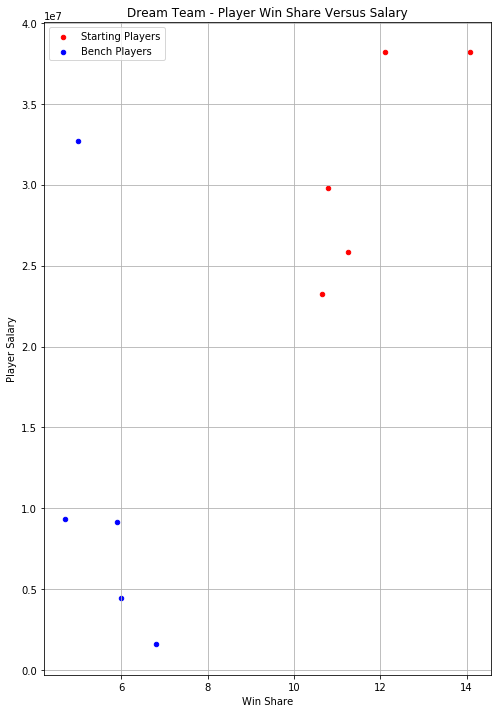

In [23]:
#creating scatter plot
ax1 = psal_merged_b.plot(kind='scatter', x='Starting_WS', y='Starting_SAL', c="r", label = "Starting Players", grid = True, figsize= (8,8))
ax2 = psal_merged_b.plot(kind='scatter', x='Bench_WS', y='Bench_SAL', c="b",label = "Bench Players", grid = True, figsize= (8,12), ax=ax1)

print(ax1 == ax2)
plt.title("Dream Team - Player Win Share Versus Salary")
plt.xlabel("Win Share")
plt.ylabel("Player Salary")

# Save Graph
plt.savefig("Dream Team-Player Win Share vs Salary.png")

In [32]:
psal_merged_b["Combined_Win_Share"] = psal_merged_b["Starting_WS"] + psal_merged_b["Bench_WS"]
psal_merged_b["Combined_Salary"] = (psal_merged_b["Starting_SAL"] + psal_merged_b["Bench_SAL"])/1000000

psal_merged_b

,Position,Starting_WS,Bench_WS,Starting_SAL,Bench_SAL,Combined_Win_Share,Combined_Salary
0,C,10.64,6.8,23241573.0,1599712.0,17.44,24.841285
1,PF,11.24,6.0,25842697.0,4464226.0,17.24,30.306923
2,PG,10.78,5.9,29802321.0,9133907.0,16.68,38.936228
3,SF,12.10,5.0,38199000.0,32700690.0,17.10,70.899690
4,SG,14.08,4.7,38199000.0,9346153.0,18.78,47.545153


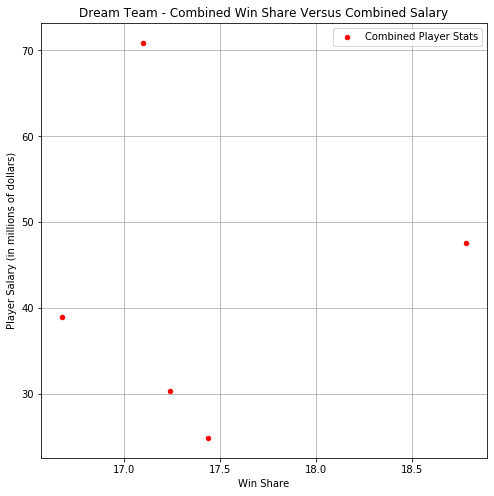

In [34]:
psal_merged_b.plot(kind='scatter', x='Combined_Win_Share', y='Combined_Salary', c="r", label = "Combined Player Stats", grid = True, figsize= (8,8))
plt.title("Dream Team - Combined Win Share Versus Combined Salary")
plt.xlabel("Win Share")
plt.ylabel("Player Salary (in millions of dollars)")
# Save Graph
plt.savefig("Dream Team-Combined Win Share vs Salary.png")

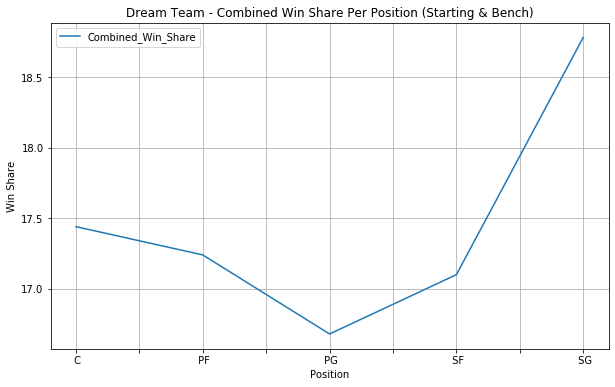

In [35]:
psal_merged_b.plot.line(x = "Position", y = "Combined_Win_Share",grid = True, figsize= (10,6))
plt.title("Dream Team - Combined Win Share Per Position (Starting & Bench)")
plt.xlabel("Position")
plt.ylabel("Win Share")
# Save Graph
plt.savefig("Dream Team-Combined Win Share Per Position.png")

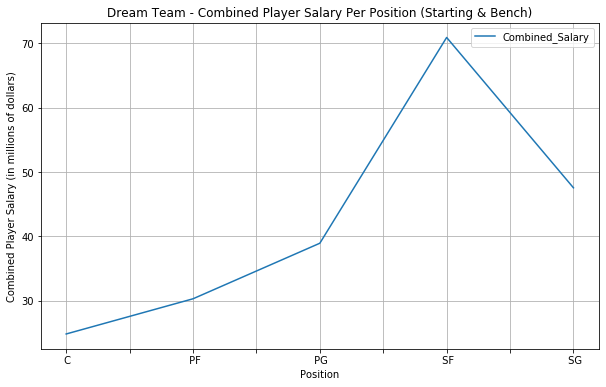

In [37]:
psal_merged_b.plot.line(x = "Position", y = 'Combined_Salary',grid = True, figsize= (10,6))
plt.title("Dream Team - Combined Player Salary Per Position (Starting & Bench)")
plt.xlabel("Position")
plt.ylabel("Combined Player Salary (in millions of dollars)")
# Save Graph
plt.savefig("Dream Team-Combined Player Salary Per Position.png")

In [38]:
psal_merged_c = psal_merged_b.drop(labels="Starting_WS",axis=1)
psal_merged_d = psal_merged_c.drop(labels="Bench_WS",axis=1)
psal_merged_e = psal_merged_d.drop(labels="Bench_SAL",axis=1)
psal_merged_f = psal_merged_e.drop(labels="Starting_SAL",axis=1)
psal_merged_g = psal_merged_f.reset_index(drop=True, inplace=False)
psal_merged_g

,Position,Combined_Win_Share,Combined_Salary
0,C,17.44,24.841285
1,PF,17.24,30.306923
2,PG,16.68,38.936228
3,SF,17.10,70.899690
4,SG,18.78,47.545153


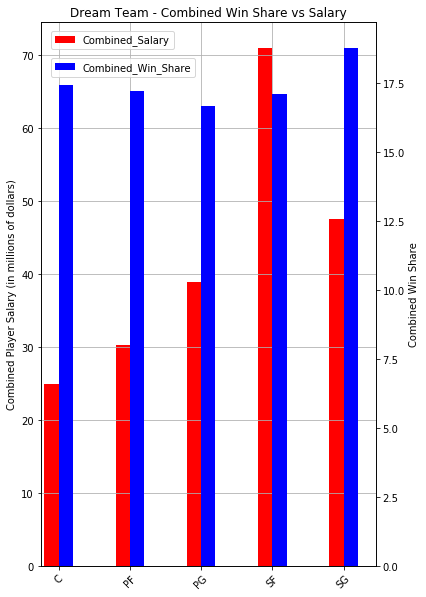

<Figure size 432x288 with 0 Axes>

In [85]:
fontsize = 20
t = np.arange(0.0, 6.0, 1)
xticklabels = ['C','PF','PG','SF','SG']

fig = plt.figure()

ax = fig.add_subplot(111) 
ax2 = ax.twinx()

width = 0.2

psal_merged_f.Combined_Salary.plot(kind='bar', color='red', ax=ax, width=width, position=1,grid = True, figsize= (6,10))
psal_merged_f.Combined_Win_Share.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.tick_params(axis='both', which='major')
ax.set_xticklabels(xticklabels, rotation = 45)
ax.set_ylabel('Combined Player Salary (in millions of dollars)')
ax2.set_ylabel('Combined Win Share')

ax.legend(loc = (.03,.95), frameon = True)
ax2.legend( loc = (.03, .90), frameon = True)


plt.title("Dream Team - Combined Win Share vs Salary")
plt.show()

# Save Graph
plt.savefig("Dream Team-Combined Win Share vs Salary.png")

In [26]:
#Scenario 1.2 creating a roster with a focus on Offence

In [43]:
#identify offence starting players
osp_a = ActivePlayerStats.groupby(["Position", "Player"]).agg({'OWS':"mean"})
osp_b = osp_a['OWS'].groupby(level=0, group_keys=False)
osp_c = osp_b.apply(lambda x: x.sort_values(ascending=False))
osp_d = pd.DataFrame(osp_c.groupby("Position").head(1)).reset_index()
osp_f = osp_d.loc[(osp_d["Position"]!=" G")&(osp_d["Position"]!=" F"),:].reset_index()
osp_g = osp_f.rename(columns={"Player":"Offensive_Starting_Player","OWS":"Offensive_SP_WS"})
osp_h = osp_g.drop(columns=["index"])
osp_h

,Position,Offensive_Starting_Player,Offensive_SP_WS
0,C,Karl-Anthony Towns,7.400
1,PF,Giannis Antetokounmpo,6.980
2,PG,Damian Lillard,9.000
3,SF,Kevin Durant,8.775
4,SG,James Harden,10.780


In [44]:
#identify offensive bench players
obp_a = bp1.groupby(["Position", "Player"]).agg({'WS':"mean"})
obp_b = obp_a['WS'].groupby(level=0, group_keys=False)
obp_c = obp_b.apply(lambda x: x.sort_values(ascending=False))
obp_d = pd.DataFrame(obp_c.groupby("Position").head(1)).reset_index()
obp_f = obp_d.loc[obp_d["Position"]!=" G",:].reset_index()
obp_g = obp_f.rename(columns={"Player":"Offensive_Bench_Player","WS":"Offensive_Bench_WS"})
obp_h = obp_g.drop(columns=["index"])
obp_h

,Position,Offensive_Bench_Player,Offensive_Bench_WS
0,C,Mitchell Robinson,6.8
1,PF,Kevon Looney,6.0
2,PG,George Hill,5.9
3,SF,Gordon Hayward,5.0
4,SG,Fred VanVleet,4.7


In [45]:
offT = pd.merge(osp_h,obp_h,on="Position",how="outer")
offT

,Position,Offensive_Starting_Player,Offensive_SP_WS,Offensive_Bench_Player,Offensive_Bench_WS
0,C,Karl-Anthony Towns,7.400,Mitchell Robinson,6.8
1,PF,Giannis Antetokounmpo,6.980,Kevon Looney,6.0
2,PG,Damian Lillard,9.000,George Hill,5.9
3,SF,Kevin Durant,8.775,Gordon Hayward,5.0
4,SG,James Harden,10.780,Fred VanVleet,4.7


In [53]:
#Merging salary info for starting players
offpsal_merged = pd.merge(offT,psal,left_on="Offensive_Starting_Player",right_on="Player",how="inner")
offpsal_merged2 = offpsal_merged.rename(columns={"Player":"Off_Starting_Player2","SALARY":"Off_Starting_SAL"})
offpsal_merged2

,Position,Offensive_Starting_Player,Offensive_SP_WS,Offensive_Bench_Player,Offensive_Bench_WS,Off_Starting_Player2,Off_Starting_SAL
0,C,Karl-Anthony Towns,7.400,Mitchell Robinson,6.8,Karl-Anthony Towns,27285000.0
1,PF,Giannis Antetokounmpo,6.980,Kevon Looney,6.0,Giannis Antetokounmpo,25842697.0
2,PG,Damian Lillard,9.000,George Hill,5.9,Damian Lillard,29802321.0
3,SF,Kevin Durant,8.775,Gordon Hayward,5.0,Kevin Durant,38199000.0
4,SG,James Harden,10.780,Fred VanVleet,4.7,James Harden,38199000.0


In [63]:
#Merging salary info for bench players
offpsal_merged3 = pd.merge(offpsal_merged2,psal,left_on="Offensive_Bench_Player",right_on="Player",how="inner")
offpsal_merged4 = offpsal_merged3.rename(columns={"Player":"Off_Bench_Player2","SALARY":"Off_Bench_SAL"})
offpsal_merged5 = offpsal_merged4.drop(columns=["Off_Starting_Player2","Off_Bench_Player2"])
offpsal_merged5

,Position,Offensive_Starting_Player,Offensive_SP_WS,Offensive_Bench_Player,Offensive_Bench_WS,Off_Starting_SAL,Off_Bench_SAL
0,C,Karl-Anthony Towns,7.400,Mitchell Robinson,6.8,27285000.0,1599712.0
1,PF,Giannis Antetokounmpo,6.980,Kevon Looney,6.0,25842697.0,4464226.0
2,PG,Damian Lillard,9.000,George Hill,5.9,29802321.0,9133907.0
3,SF,Kevin Durant,8.775,Gordon Hayward,5.0,38199000.0,32700690.0
4,SG,James Harden,10.780,Fred VanVleet,4.7,38199000.0,9346153.0


In [64]:
#calculating total salary of LWR
offpsal6 = offpsal_merged5["Off_Starting_SAL"].sum()+ offpsal_merged5["Off_Bench_SAL"].sum()
offpsal7 = format(offpsal6,",.0f")
offpsal7

'216,572,706'

In [65]:
offpsal_merged5 = offpsal_merged5.drop(labels="Offensive_Starting_Player",axis=1)
offpsal_merged5_a = offpsal_merged5.drop(labels="Offensive_Bench_Player",axis=1)
offpsal_merged5_a

,Position,Offensive_SP_WS,Offensive_Bench_WS,Off_Starting_SAL,Off_Bench_SAL
0,C,7.400,6.8,27285000.0,1599712.0
1,PF,6.980,6.0,25842697.0,4464226.0
2,PG,9.000,5.9,29802321.0,9133907.0
3,SF,8.775,5.0,38199000.0,32700690.0
4,SG,10.780,4.7,38199000.0,9346153.0


True


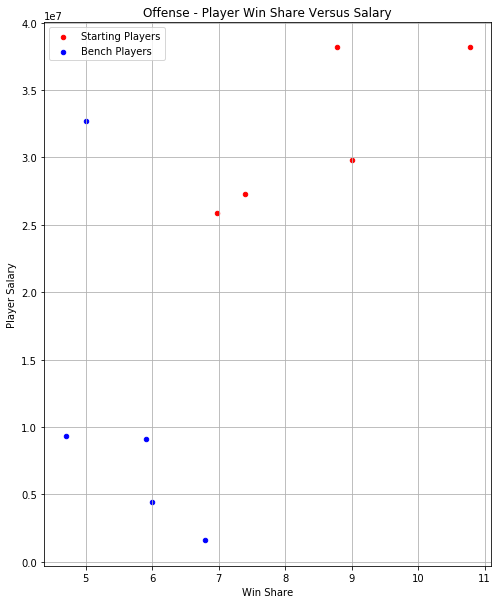

In [70]:
ax1 = offpsal_merged5_a.plot(kind='scatter', x='Offensive_SP_WS', y='Off_Starting_SAL', c="r",label="Starting Players", grid = True, figsize= (8,8))
ax2 = offpsal_merged5_a.plot(kind='scatter', x='Offensive_Bench_WS', y='Off_Bench_SAL', c="b", label="Bench Players",grid = True, figsize= (8,10), ax=ax1)

print(ax1 == ax2)
plt.title("Offense - Player Win Share Versus Salary")
plt.xlabel("Win Share")
plt.ylabel("Player Salary")
plt.legend(loc="best")

# Save Graph
plt.savefig("Offense-Player Win Share vs Salary.png")

In [68]:
offpsal_merged5_a["Offensive_Combined_WS"] = offpsal_merged5_a["Offensive_SP_WS"] + offpsal_merged5_a["Offensive_Bench_WS"]
offpsal_merged5_a["Offensive_Combined_SAL"] = offpsal_merged5_a["Off_Starting_SAL"] + offpsal_merged5_a["Off_Bench_SAL"]
offpsal_merged5_a

,Position,Offensive_SP_WS,Offensive_Bench_WS,Off_Starting_SAL,Off_Bench_SAL,Offensive_Combined_WS,Offensive_Combined_SAL
0,C,7.400,6.8,27285000.0,1599712.0,14.200,28884712.0
1,PF,6.980,6.0,25842697.0,4464226.0,12.980,30306923.0
2,PG,9.000,5.9,29802321.0,9133907.0,14.900,38936228.0
3,SF,8.775,5.0,38199000.0,32700690.0,13.775,70899690.0
4,SG,10.780,4.7,38199000.0,9346153.0,15.480,47545153.0


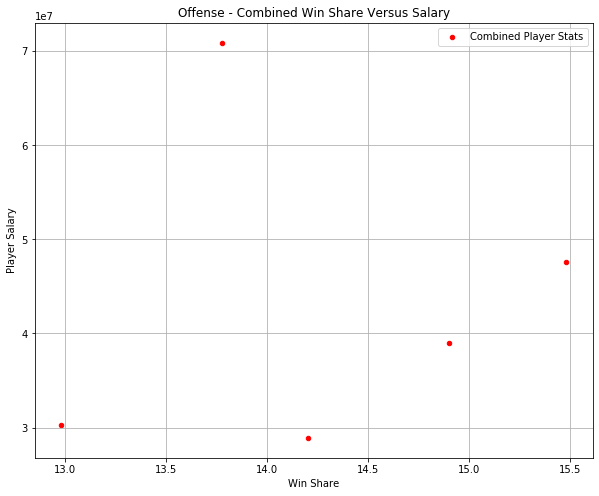

In [75]:
offpsal_merged5_a.plot(kind='scatter', x='Offensive_Combined_WS', y='Offensive_Combined_SAL', c="r", label="Combined Player Stats", grid = True, figsize= (10,8))
plt.title("Offense - Combined Win Share Versus Salary")
plt.xlabel("Win Share")
plt.ylabel("Player Salary")
plt.legend(loc="best")

# Save Graph
plt.savefig("Offense-Combined Win Share vs Salary.png")

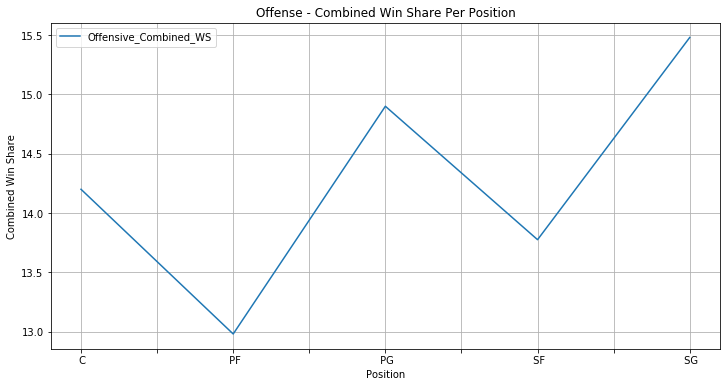

In [76]:
offpsal_merged5_a.plot.line(x = "Position", y = "Offensive_Combined_WS",grid = True, figsize= (12,6))
plt.title("Offense - Combined Win Share Per Position")
plt.legend(loc="best")
plt.xlabel("Position")
plt.ylabel("Combined Win Share")
plt.legend(loc="best")


# Save Graph
plt.savefig("Offense-Combined Win Share Per Position.png")

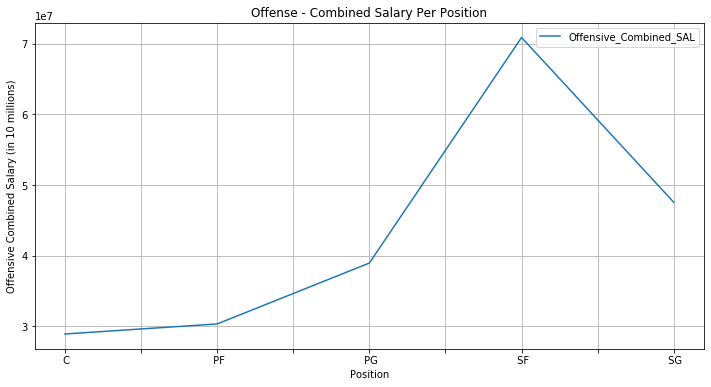

In [77]:
offpsal_merged5_a.plot.line(x = "Position", y = "Offensive_Combined_SAL",grid = True, figsize= (12,6))
plt.title("Offense - Combined Salary Per Position")
plt.xlabel("Position")
plt.ylabel("Offensive Combined Salary (in 10 millions)")
plt.legend(loc="best")

# Save Graph
plt.savefig("Offense-Combined Win Share Per Position.png")

In [80]:
offpsal_merged5_b = offpsal_merged5_a.drop(labels="Offensive_SP_WS",axis=1)
offpsal_merged5_c = offpsal_merged5_b.drop(labels="Offensive_Bench_WS",axis=1)
offpsal_merged5_d = offpsal_merged5_c.drop(labels="Off_Starting_SAL",axis=1)
offpsal_merged5_e = offpsal_merged5_d.drop(labels="Off_Bench_SAL",axis=1)
offpsal_merged5_f = offpsal_merged5_e.reset_index(drop=True, inplace=False)
offpsal_merged5_f

,Position,Offensive_Combined_WS,Offensive_Combined_SAL
0,C,14.200,28884712.0
1,PF,12.980,30306923.0
2,PG,14.900,38936228.0
3,SF,13.775,70899690.0
4,SG,15.480,47545153.0


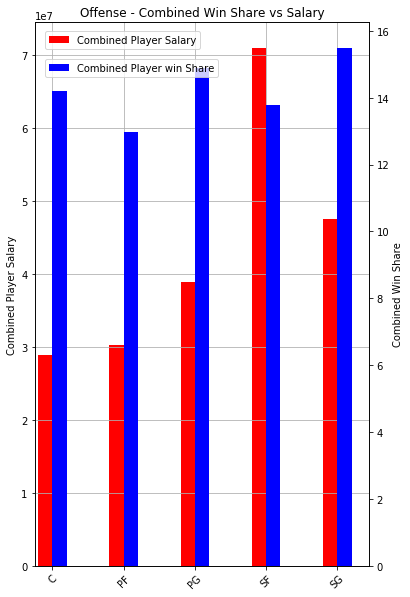

<Figure size 432x288 with 0 Axes>

In [86]:
fontsize = 20
t = np.arange(0.0, 6.0, 1)
xticklabels = ['C','PF','PG','SF','SG']

fig = plt.figure()

ax = fig.add_subplot(111) 
ax2 = ax.twinx()

width = 0.2

offpsal_merged5_f.Offensive_Combined_SAL.plot(kind='bar', color='red', ax=ax, width=width, position=1,label="Combined Player Salary",grid = True, figsize= (6,10))
offpsal_merged5_f.Offensive_Combined_WS.plot(kind='bar', color='blue', ax=ax2, width=width, position=0, label="Combined Player win Share")

ax.set_xticklabels(xticklabels, rotation = 45)
ax.set_ylabel('Combined Player Salary')
ax2.set_ylabel('Combined Win Share')

ax.legend(loc = (.03,.95), frameon = True)
ax2.legend( loc = (.03, .90), frameon = True)

plt.title("Offense - Combined Win Share vs Salary")
plt.show()

# Save Graph
plt.savefig("Offense-Combined Win Share vs Salary.png")

In [43]:
#Scenario 1.4 creating a roster with a focus on WS/Salary

In [90]:
#calculating WS/$salary
ActivePlayerStats2 = ActivePlayerStats
ActivePlayerStats2["SALARY_Millions"] = ActivePlayerStats2["SALARY"]/1000000
ActivePlayerStats2["WS_per_Mil"] = ActivePlayerStats2["WS"]/ActivePlayerStats2["SALARY_Millions"]
ActivePlayerStats2

C:\Users\lluo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lluo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Player,is_active,Rank (WS),Year,Pos,Age,Tm,G,MP,PER,...,OBPM,DBPM,BPM,VORP,RK,Position,TEAM,SALARY,SALARY_Millions,WS_per_Mil
0,Steven Adams,True,44.0,2016.0,C,22.0,OKC,80.0,2014.0,15.5,...,0.0,0.2,0.2,1.1,41.0,C,Oklahoma City Thunder,25842697.0,25.842697,0.251522
1,Steven Adams,True,47.0,2017.0,C,23.0,OKC,80.0,2389.0,16.5,...,-0.2,0.0,-0.2,1.1,41.0,C,Oklahoma City Thunder,25842697.0,25.842697,0.251522
2,Steven Adams,True,15.0,2018.0,C,24.0,OKC,76.0,2487.0,20.6,...,1.7,-0.6,1.1,2.0,41.0,C,Oklahoma City Thunder,25842697.0,25.842697,0.375348
3,Steven Adams,True,17.0,2019.0,C,25.0,OKC,80.0,2669.0,18.5,...,0.7,0.4,1.1,2.1,41.0,C,Oklahoma City Thunder,25842697.0,25.842697,0.352130
4,Steven Adams,True,21.0,2020.0,C,26.0,OKC,58.0,1564.0,20.8,...,2.1,1.1,3.2,2.0,41.0,C,Oklahoma City Thunder,25842697.0,25.842697,0.239913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,Cody Zeller,True,102.0,2020.0,C,27.0,CHO,58.0,1341.0,18.8,...,0.2,-0.8,-0.6,0.5,88.0,C,Charlotte Hornets,14471910.0,14.471910,0.248758
1559,Ivica Zubac,True,301.0,2017.0,C,19.0,LAL,38.0,609.0,17.0,...,-1.2,-0.6,-1.7,0.0,181.0,C,LA Clippers,6481482.0,6.481482,0.169714
1560,Ivica Zubac,True,305.0,2018.0,C,20.0,LAL,43.0,410.0,15.3,...,-1.8,-0.3,-2.0,0.0,181.0,C,LA Clippers,6481482.0,6.481482,0.154286
1561,Ivica Zubac,True,148.0,2019.0,C,21.0,TOT,59.0,1040.0,18.9,...,-0.2,-0.2,-0.5,0.4,181.0,C,LA Clippers,6481482.0,6.481482,0.493714


In [91]:
APS_2020 = ActivePlayerStats2.loc[ActivePlayerStats2["Year"]==2020,:]

# APS_2020 = APS_2020.nlargest(10,["WS_per_Mil"])
APS_2020

,Player,is_active,Rank (WS),Year,Pos,Age,Tm,G,MP,PER,...,OBPM,DBPM,BPM,VORP,RK,Position,TEAM,SALARY,SALARY_Millions,WS_per_Mil
4,Steven Adams,True,21.0,2020.0,C,26.0,OKC,58.0,1564.0,20.8,...,2.1,1.1,3.2,2.0,41.0,C,Oklahoma City Thunder,25842697.0,25.842697,0.239913
7,Bam Adebayo,True,9.0,2020.0,PF,22.0,MIA,65.0,2235.0,20.6,...,1.6,2.1,3.6,3.2,260.0,PF,Miami Heat,3454080.0,3.454080,2.345053
12,LaMarcus Aldridge,True,64.0,2020.0,C,34.0,SAS,53.0,1754.0,19.8,...,1.8,-0.5,1.3,1.5,40.0,PF,San Antonio Spurs,26000000.0,26.000000,0.169231
13,Nickeil Alexander-Walker,True,506.0,2020.0,SG,21.0,NOP,41.0,501.0,7.6,...,-3.5,-1.4,-4.9,-0.4,272.0,SG,New Orleans Pelicans,2964840.0,2.964840,-0.134915
15,Grayson Allen,True,306.0,2020.0,SG,24.0,MEM,30.0,498.0,11.4,...,-1.0,-1.5,-2.6,-0.1,301.0,SG,Memphis Grizzlies,2429400.0,2.429400,0.288137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546,Delon Wright,True,73.0,2020.0,SG,27.0,DAL,65.0,1412.0,16.1,...,0.4,2.0,2.4,1.6,136.0,PG,Dallas Mavericks,9473684.0,9.473684,0.453889
1551,Thaddeus Young,True,210.0,2020.0,PF,31.0,CHI,64.0,1591.0,13.3,...,-1.4,0.2,-1.1,0.4,97.0,PF,Chicago Bulls,12900000.0,12.900000,0.147287
1553,Trae Young,True,27.0,2020.0,PG,21.0,ATL,60.0,2120.0,23.9,...,6.3,-2.3,4.0,3.2,185.0,PG,Atlanta Hawks,6273000.0,6.273000,0.940539
1558,Cody Zeller,True,102.0,2020.0,C,27.0,CHO,58.0,1341.0,18.8,...,0.2,-0.8,-0.6,0.5,88.0,C,Charlotte Hornets,14471910.0,14.471910,0.248758


In [92]:
#identify players who played more than 1600 minutes

sp_APS_2020 = APS_2020.loc[(APS_2020["MP"]>1600)]
sp_APS_2020

,Player,is_active,Rank (WS),Year,Pos,Age,Tm,G,MP,PER,...,OBPM,DBPM,BPM,VORP,RK,Position,TEAM,SALARY,SALARY_Millions,WS_per_Mil
7,Bam Adebayo,True,9.0,2020.0,PF,22.0,MIA,65.0,2235.0,20.6,...,1.6,2.1,3.6,3.2,260.0,PF,Miami Heat,3454080.0,3.454080,2.345053
12,LaMarcus Aldridge,True,64.0,2020.0,C,34.0,SAS,53.0,1754.0,19.8,...,1.8,-0.5,1.3,1.5,40.0,PF,San Antonio Spurs,26000000.0,26.000000,0.169231
18,Jarrett Allen,True,16.0,2020.0,C,21.0,BRK,64.0,1647.0,20.3,...,1.0,1.1,2.1,1.7,303.0,C,Brooklyn Nets,2376840.0,2.376840,2.987159
46,Giannis Antetokounmpo,True,2.0,2020.0,PF,25.0,MIL,57.0,1763.0,31.6,...,7.4,4.1,11.5,6.0,42.0,PF,Milwaukee Bucks,25842697.0,25.842697,0.402435
54,Carmelo Anthony,True,275.0,2020.0,PF,35.0,POR,50.0,1623.0,12.2,...,-1.9,-1.8,-3.7,-0.7,467.0,PF,Portland Trail Blazers,1364204.0,1.364204,0.733028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,Coby White,True,293.0,2020.0,SG,19.0,CHI,65.0,1674.0,11.9,...,-1.2,-1.6,-2.8,-0.3,200.0,PG,Chicago Bulls,5307120.0,5.307120,0.169584
1507,Hassan Whiteside,True,12.0,2020.0,C,30.0,POR,61.0,1911.0,25.0,...,2.5,0.7,3.2,2.5,38.0,C,Portland Trail Blazers,27093017.0,27.093017,0.298970
1512,Andrew Wiggins,True,209.0,2020.0,SF-SG,24.0,TOT,54.0,1858.0,16.4,...,1.1,-1.5,-0.3,0.8,28.0,SF,Minnesota Timberwolves,27504630.0,27.504630,0.069079
1522,Lou Williams,True,91.0,2020.0,SG,33.0,LAC,60.0,1757.0,17.2,...,2.1,-1.4,0.8,1.2,157.0,SG,LA Clippers,8000000.0,8.000000,0.487500


In [93]:
#identify starting players based on ws per million dollar spent
wmsp_a = sp_APS_2020.groupby(["Position", "Player"]).agg({'WS_per_Mil':"mean"})
wmsp_b = wmsp_a['WS_per_Mil'].groupby(level=0, group_keys=False)
wmsp_c = wmsp_b.apply(lambda x: x.sort_values(ascending=False))
wmsp_d = pd.DataFrame(wmsp_c)
wmsp_e = wmsp_d.groupby("Position").head(1).reset_index()
wmsp_f = wmsp_e.loc[(wmsp_e["Position"]!=" G")&(wmsp_e["Position"]!=" F"),:].reset_index()
wmsp_g = wmsp_f.rename(columns={"Player":"WM_Starting_Player","WS_per_Mil":"WS_per_Mil_Starting"})
wmsp_h = wmsp_g.drop(columns=["index"])
wmsp_h

,Position,WM_Starting_Player,WS_per_Mil_Starting
0,C,Jarrett Allen,2.987159
1,PF,Bam Adebayo,2.345053
2,PG,Devonte' Graham,2.399686
3,SF,Royce O'Neale,2.471394
4,SG,Duncan Robinson,3.317213


In [94]:
#identify players who played more than 1400 but less than 1600 minutes

bp_APS_2020 = APS_2020.loc[(APS_2020["MP"]<1600)&(APS_2020["MP"]>1400)]
bp_APS_2020

,Player,is_active,Rank (WS),Year,Pos,Age,Tm,G,MP,PER,...,OBPM,DBPM,BPM,VORP,RK,Position,TEAM,SALARY,SALARY_Millions,WS_per_Mil
4,Steven Adams,True,21.0,2020.0,C,26.0,OKC,58.0,1564.0,20.8,...,2.1,1.1,3.2,2.0,41.0,C,Oklahoma City Thunder,25842697.0,25.842697,0.239913
65,Trevor Ariza,True,161.0,2020.0,SF,34.0,TOT,53.0,1493.0,11.0,...,-1.5,0.9,-0.5,0.6,110.0,SF,Sacramento Kings,12195122.0,12.195122,0.213200
142,Davis Bertans,True,103.0,2020.0,PF,27.0,WAS,54.0,1583.0,15.5,...,2.7,-1.8,0.9,1.1,174.0,SF,Washington Wizards,7000000.0,7.000000,0.500000
166,Eric Bledsoe,True,35.0,2020.0,PG,30.0,MIL,56.0,1524.0,18.1,...,1.1,1.1,2.2,1.6,78.0,PG,Milwaukee Bucks,15625000.0,15.625000,0.339200
167,Bogdan Bogdanovic,True,176.0,2020.0,SG,27.0,SAC,53.0,1510.0,14.3,...,0.7,-0.3,0.4,0.9,148.0,SG,Sacramento Kings,8529386.0,8.529386,0.281380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392,Garrett Temple,True,198.0,2020.0,SG,33.0,BRK,55.0,1547.0,10.3,...,-1.5,0.4,-1.1,0.4,215.0,SG,Brooklyn Nets,4767000.0,4.767000,0.440529
1473,Kemba Walker,True,34.0,2020.0,PG,29.0,BOS,50.0,1592.0,20.2,...,5.0,-0.2,4.7,2.7,14.0,PG,Boston Celtics,32742000.0,32.742000,0.164926
1502,Derrick White,True,119.0,2020.0,SG,25.0,SAS,61.0,1468.0,15.9,...,0.7,0.2,0.9,1.1,335.0,PG,San Antonio Spurs,1948080.0,1.948080,1.745308
1546,Delon Wright,True,73.0,2020.0,SG,27.0,DAL,65.0,1412.0,16.1,...,0.4,2.0,2.4,1.6,136.0,PG,Dallas Mavericks,9473684.0,9.473684,0.453889


In [95]:
#identify bench players based on WS per million dollar spent
wmbp_a = bp_APS_2020.groupby(["Position", "Player"]).agg({'WS_per_Mil':"mean"})
wmbp_b = wmbp_a['WS_per_Mil'].groupby(level=0, group_keys=False)
wmbp_c = wmbp_b.apply(lambda x: x.sort_values(ascending=False))
wmbp_d = pd.DataFrame(wmbp_c)
wmbp_e = wmbp_d.groupby("Position").head(1).reset_index()
wmbp_f = wmbp_e.loc[(wmbp_e["Position"]!=" G")&(wmbp_e["Position"]!=" F"),:].reset_index()
wmbp_g = wmbp_f.rename(columns={"Player":"WM_Bench_Player","WS_per_Mil":"WS_per_Mil_Bench"})
wmbp_h = wmbp_g.drop(columns=["index"])
wmbp_h

,Position,WM_Bench_Player,WS_per_Mil_Bench
0,C,Mitchell Robinson,4.250765
1,PF,Lauri Markkanen,0.490529
2,PG,Monte Morris,2.140747
3,SF,Josh Hart,1.631262
4,SG,Damion Lee,2.018219


In [96]:
#create roster based on win share per million spent
WMR = pd.merge(wmsp_h,wmbp_h,on="Position",how="outer")
WMR

,Position,WM_Starting_Player,WS_per_Mil_Starting,WM_Bench_Player,WS_per_Mil_Bench
0,C,Jarrett Allen,2.987159,Mitchell Robinson,4.250765
1,PF,Bam Adebayo,2.345053,Lauri Markkanen,0.490529
2,PG,Devonte' Graham,2.399686,Monte Morris,2.140747
3,SF,Royce O'Neale,2.471394,Josh Hart,1.631262
4,SG,Duncan Robinson,3.317213,Damion Lee,2.018219


In [97]:
#create a WS table
ws_2020 = APS_2020[["Player","WS"]]
ws_2020

,Player,WS
4,Steven Adams,6.2
7,Bam Adebayo,8.1
12,LaMarcus Aldridge,4.4
13,Nickeil Alexander-Walker,-0.4
15,Grayson Allen,0.7
...,...,...
1546,Delon Wright,4.3
1551,Thaddeus Young,1.9
1553,Trae Young,5.9
1558,Cody Zeller,3.6


In [98]:
#lookup 2020 win share based on the above roster
wm_merged = pd.merge(WMR,ws_2020,left_on="WM_Starting_Player",right_on="Player",how="inner")
wm_merged2 = wm_merged.rename(columns={"Player":"WM_Starting_Player2","WS":"WM_Starting_WS"})
wm_merged2

,Position,WM_Starting_Player,WS_per_Mil_Starting,WM_Bench_Player,WS_per_Mil_Bench,WM_Starting_Player2,WM_Starting_WS
0,C,Jarrett Allen,2.987159,Mitchell Robinson,4.250765,Jarrett Allen,7.1
1,PF,Bam Adebayo,2.345053,Lauri Markkanen,0.490529,Bam Adebayo,8.1
2,PG,Devonte' Graham,2.399686,Monte Morris,2.140747,Devonte' Graham,3.4
3,SF,Royce O'Neale,2.471394,Josh Hart,1.631262,Royce O'Neale,4.0
4,SG,Duncan Robinson,3.317213,Damion Lee,2.018219,Duncan Robinson,4.7


In [99]:
#merging in bench player win share
wm_merged3 = pd.merge(wm_merged2,ws_2020,left_on="WM_Bench_Player",right_on="Player",how="inner")
wm_merged4 = wm_merged3.rename(columns={"Player":"WM_Bench_Player2","WS":"WM_Bench_WS"})
wm_merged5 = wm_merged4.drop(columns=["WM_Starting_Player2","WM_Bench_Player2"])
wm_merged5

,Position,WM_Starting_Player,WS_per_Mil_Starting,WM_Bench_Player,WS_per_Mil_Bench,WM_Starting_WS,WM_Bench_WS
0,C,Jarrett Allen,2.987159,Mitchell Robinson,4.250765,7.1,6.8
1,PF,Bam Adebayo,2.345053,Lauri Markkanen,0.490529,8.1,2.6
2,PG,Devonte' Graham,2.399686,Monte Morris,2.140747,3.4,3.4
3,SF,Royce O'Neale,2.471394,Josh Hart,1.631262,4.0,2.7
4,SG,Duncan Robinson,3.317213,Damion Lee,2.018219,4.7,1.7


In [100]:
#calculating total Win Share of above roster
wm_ws = wm_merged5["WM_Starting_WS"].sum()+ wm_merged5["WM_Bench_WS"].sum()
wm_ws2 = format(wm_ws,",.2f")
wm_ws2
print(f"Total win share of the money-ball is {wm_ws2}")

Total win share of the money-ball is 44.50


In [101]:
wmps_2020 = APS_2020[["Player","SALARY"]]
wmps_2020

,Player,SALARY
4,Steven Adams,25842697.0
7,Bam Adebayo,3454080.0
12,LaMarcus Aldridge,26000000.0
13,Nickeil Alexander-Walker,2964840.0
15,Grayson Allen,2429400.0
...,...,...
1546,Delon Wright,9473684.0
1551,Thaddeus Young,12900000.0
1553,Trae Young,6273000.0
1558,Cody Zeller,14471910.0


In [102]:
#look up 2020 starting player salary
wmsal_merged = pd.merge(wm_merged5,wmps_2020,left_on="WM_Starting_Player",right_on="Player",how="inner")
wmsal_merged2 = wmsal_merged.rename(columns={"Player":"WM_Starting_Player2","SALARY":"WM_Starting_SAL"})
wmsal_merged2

,Position,WM_Starting_Player,WS_per_Mil_Starting,WM_Bench_Player,WS_per_Mil_Bench,WM_Starting_WS,WM_Bench_WS,WM_Starting_Player2,WM_Starting_SAL
0,C,Jarrett Allen,2.987159,Mitchell Robinson,4.250765,7.1,6.8,Jarrett Allen,2376840.0
1,PF,Bam Adebayo,2.345053,Lauri Markkanen,0.490529,8.1,2.6,Bam Adebayo,3454080.0
2,PG,Devonte' Graham,2.399686,Monte Morris,2.140747,3.4,3.4,Devonte' Graham,1416852.0
3,SF,Royce O'Neale,2.471394,Josh Hart,1.631262,4.0,2.7,Royce O'Neale,1618520.0
4,SG,Duncan Robinson,3.317213,Damion Lee,2.018219,4.7,1.7,Duncan Robinson,1416852.0


In [103]:
#look up 2020 bench player salary
wmsal_merged3 = pd.merge(wmsal_merged2,wmps_2020,left_on="WM_Bench_Player",right_on="Player",how="inner")
wmsal_merged4 = wmsal_merged3.rename(columns={"Player":"WM_Bench_Player2","SALARY":"WM_Bench_SAL"})
wmsal_merged5 = wmsal_merged4.drop(columns=["WM_Starting_Player2","WM_Bench_Player2"])
wmsal_merged5

,Position,WM_Starting_Player,WS_per_Mil_Starting,WM_Bench_Player,WS_per_Mil_Bench,WM_Starting_WS,WM_Bench_WS,WM_Starting_SAL,WM_Bench_SAL
0,C,Jarrett Allen,2.987159,Mitchell Robinson,4.250765,7.1,6.8,2376840.0,1599712.0
1,PF,Bam Adebayo,2.345053,Lauri Markkanen,0.490529,8.1,2.6,3454080.0,5300400.0
2,PG,Devonte' Graham,2.399686,Monte Morris,2.140747,3.4,3.4,1416852.0,1588231.0
3,SF,Royce O'Neale,2.471394,Josh Hart,1.631262,4.0,2.7,1618520.0,1655160.0
4,SG,Duncan Robinson,3.317213,Damion Lee,2.018219,4.7,1.7,1416852.0,842327.0


In [104]:
#calculating total Salary of above roster
wm_sal = wmsal_merged5["WM_Starting_SAL"].sum()+ wmsal_merged5["WM_Bench_SAL"].sum()
wm_sal2 = format(wm_sal,",.0f")
wm_sal2
print(f"Total salary cost of the money-ball is ${wm_sal2}")

Total salary cost of the money-ball is $21,268,974


In [105]:
wmsal_merged5 = wmsal_merged5.drop(labels="WM_Starting_Player",axis=1)
wmsal_merged5_a = wmsal_merged5.drop(labels="WM_Bench_Player",axis=1)
wmsal_merged5_a

,Position,WS_per_Mil_Starting,WS_per_Mil_Bench,WM_Starting_WS,WM_Bench_WS,WM_Starting_SAL,WM_Bench_SAL
0,C,2.987159,4.250765,7.1,6.8,2376840.0,1599712.0
1,PF,2.345053,0.490529,8.1,2.6,3454080.0,5300400.0
2,PG,2.399686,2.140747,3.4,3.4,1416852.0,1588231.0
3,SF,2.471394,1.631262,4.0,2.7,1618520.0,1655160.0
4,SG,3.317213,2.018219,4.7,1.7,1416852.0,842327.0


True


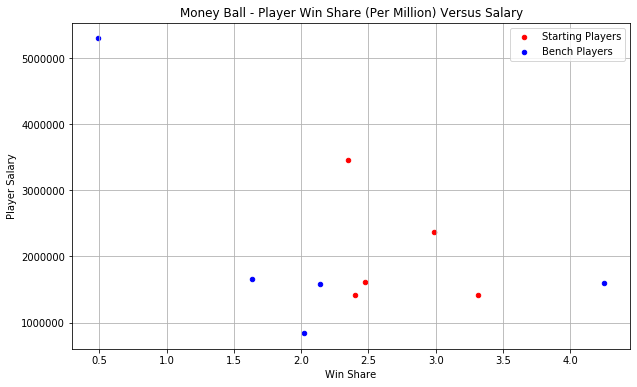

In [116]:
ax1 = wmsal_merged5_a.plot(kind='scatter', x='WS_per_Mil_Starting', y='WM_Starting_SAL', c="r",label="Starting Players", grid = True, figsize= (8,8))
ax2 = wmsal_merged5_a.plot(kind='scatter', x='WS_per_Mil_Bench', y='WM_Bench_SAL', c="b", label="Bench Players",grid = True, figsize= (10,6), ax=ax1)

print(ax1 == ax2)
plt.title("Money Ball - Player Win Share (Per Million) Versus Salary")
plt.xlabel("Win Share")
plt.ylabel("Player Salary")
plt.legend(loc="best")

# Save Graph
plt.savefig("Money Ball - Player Win Share (per Million) vs Salary.png")


True


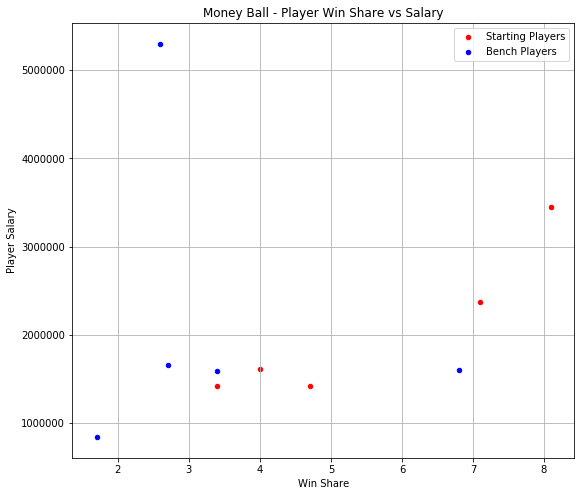

In [120]:
ax1 = wmsal_merged5_a.plot(kind='scatter', x='WM_Starting_WS', y='WM_Starting_SAL', c="r",label="Starting Players", grid = True, figsize= (8,8))
ax2 = wmsal_merged5_a.plot(kind='scatter', x='WM_Bench_WS', y='WM_Bench_SAL', c="b", label="Bench Players",grid = True, figsize= (9,8), ax=ax1)

print(ax1 == ax2)
plt.title("Money Ball - Player Win Share vs Salary")
plt.xlabel("Win Share")
plt.ylabel("Player Salary")
plt.legend(loc="best")

# Save Graph
plt.savefig("Money Ball - Player Win Share vs Salary.png")


In [108]:
wmsal_merged5_a["WM_Combined_WS"] = wmsal_merged5_a["WM_Starting_WS"] + wmsal_merged5_a["WM_Bench_WS"]
wmsal_merged5_a["WM_Combined_SAL"] = wmsal_merged5_a["WM_Starting_SAL"] + wmsal_merged5_a["WM_Bench_SAL"]
wmsal_merged5_a["WM_Combined_WS_M"] = wmsal_merged5_a["WS_per_Mil_Starting"] + wmsal_merged5_a["WS_per_Mil_Bench"]
wmsal_merged5_a

,Position,WS_per_Mil_Starting,WS_per_Mil_Bench,WM_Starting_WS,WM_Bench_WS,WM_Starting_SAL,WM_Bench_SAL,WM_Combined_WS,WM_Combined_SAL,WM_Combined_WS_M
0,C,2.987159,4.250765,7.1,6.8,2376840.0,1599712.0,13.9,3976552.0,7.237925
1,PF,2.345053,0.490529,8.1,2.6,3454080.0,5300400.0,10.7,8754480.0,2.835582
2,PG,2.399686,2.140747,3.4,3.4,1416852.0,1588231.0,6.8,3005083.0,4.540433
3,SF,2.471394,1.631262,4.0,2.7,1618520.0,1655160.0,6.7,3273680.0,4.102656
4,SG,3.317213,2.018219,4.7,1.7,1416852.0,842327.0,6.4,2259179.0,5.335432


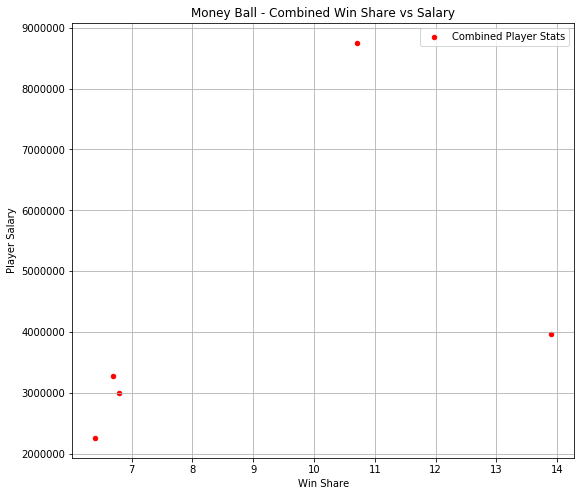

In [121]:
wmsal_merged5_a.plot(kind='scatter', x='WM_Combined_WS', y='WM_Combined_SAL', c="r", label="Combined Player Stats", grid = True, figsize= (9,8))
plt.title("Money Ball - Combined Win Share vs Salary")
plt.xlabel("Win Share")
plt.ylabel("Player Salary")
plt.legend(loc="best")

# Save Graph
plt.savefig("Money Ball - Combined Win Share vs Salary.png")


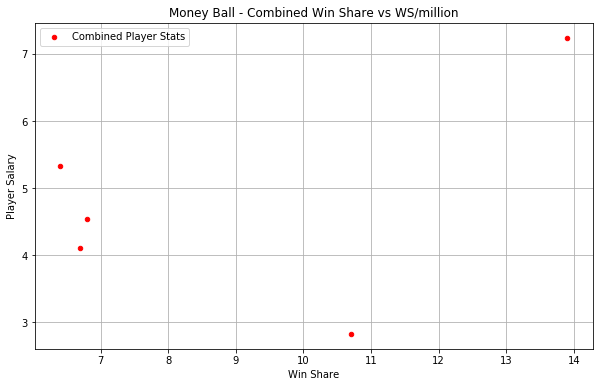

In [123]:
wmsal_merged5_a.plot(kind='scatter', x='WM_Combined_WS', y='WM_Combined_WS_M', c="r", label="Combined Player Stats", grid = True, figsize= (10,6))
plt.title("Money Ball - Combined Win Share vs WS/million")
plt.xlabel("Win Share")
plt.ylabel("Player Salary")
plt.legend(loc="best")

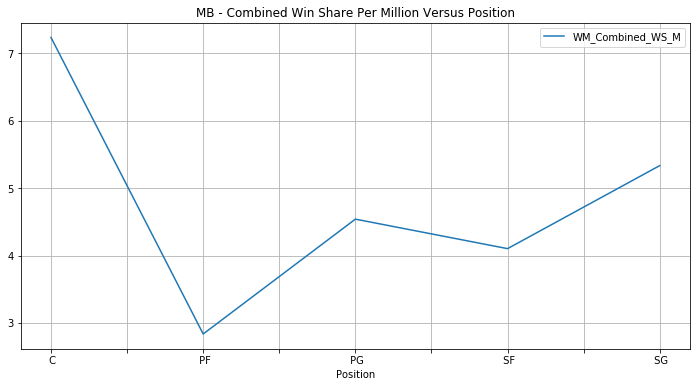

In [124]:
wmsal_merged5_a.plot.line(x = "Position", y = 'WM_Combined_WS_M',grid = True, figsize= (12,6))
plt.title("MB - Combined Win Share Per Million Versus Position")
plt.legend(loc="best")

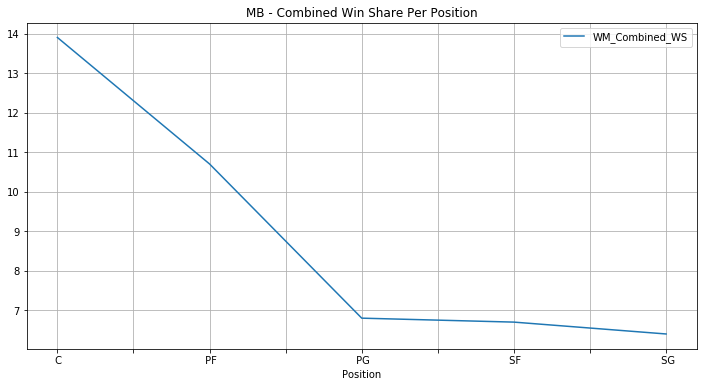

In [112]:
wmsal_merged5_a.plot.line(x = "Position", y = 'WM_Combined_WS',grid = True, figsize= (12,6))
plt.title("MB - Combined Win Share Per Position")
plt.legend(loc="best")

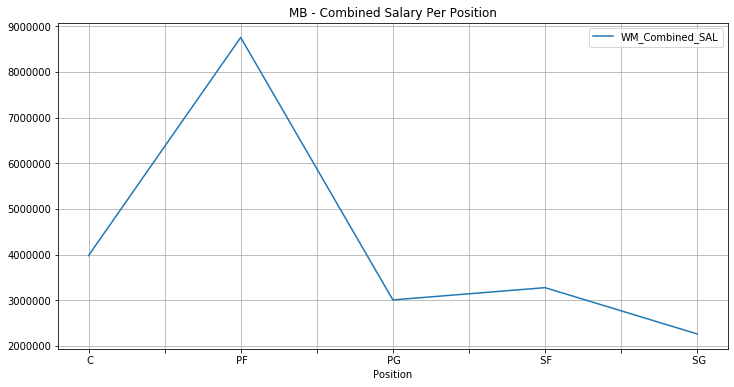

In [113]:
wmsal_merged5_a.plot.line(x = "Position", y = 'WM_Combined_SAL',grid = True, figsize= (12,6))
plt.title("MB - Combined Salary Per Position")
plt.legend(loc="best")

In [114]:
wmsal_merged5_b = wmsal_merged5_a.drop(labels="WS_per_Mil_Starting",axis=1)
wmsal_merged5_c = wmsal_merged5_b.drop(labels="WS_per_Mil_Bench",axis=1)
wmsal_merged5_d = wmsal_merged5_c.drop(labels="WM_Starting_WS",axis=1)
wmsal_merged5_e = wmsal_merged5_d.drop(labels="WM_Bench_WS",axis=1)
wmsal_merged5_f = wmsal_merged5_e.drop(labels="WM_Starting_SAL",axis=1)
wmsal_merged5_g = wmsal_merged5_f.drop(labels="WM_Bench_SAL",axis=1)
wmsal_merged5_g

,Position,WM_Combined_WS,WM_Combined_SAL,WM_Combined_WS_M
0,C,13.9,3976552.0,7.237925
1,PF,10.7,8754480.0,2.835582
2,PG,6.8,3005083.0,4.540433
3,SF,6.7,3273680.0,4.102656
4,SG,6.4,2259179.0,5.335432


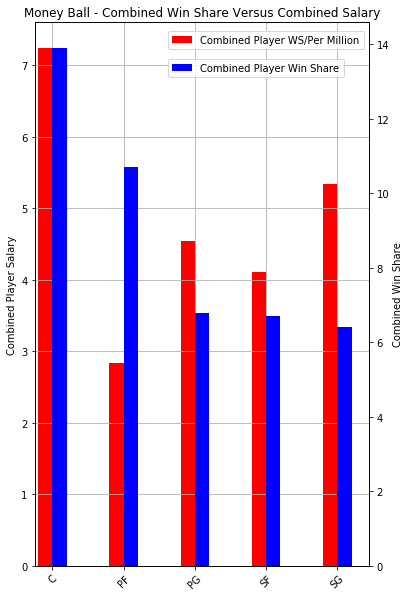

In [125]:
fontsize = 20
t = np.arange(0.0, 6.0, 1)
xticklabels = ['C','PF','PG','SF','SG']

fig = plt.figure()

ax = fig.add_subplot(111) 
ax2 = ax.twinx()

width = 0.2

wmsal_merged5_g.WM_Combined_WS_M.plot(kind='bar', color='red', ax=ax, width=width, position=1,label="Combined Player WS/Per Million",grid = True, figsize= (6,10))
wmsal_merged5_g.WM_Combined_WS.plot(kind='bar', color='blue', ax=ax2, width=width, position=0, label="Combined Player Win Share")

ax.set_xticklabels(xticklabels, rotation = 45)
ax.set_ylabel('Combined Player Salary')
ax2.set_ylabel('Combined Win Share')

ax.legend(loc = (.4,.95), frameon = True)
ax2.legend( loc = (.4, .90), frameon = True)

plt.title("Money Ball - Combined Win Share Versus Combined Salary")
plt.show()